In [2]:
## Importação dos pacotes geopandas e matplotlib
import matplotlib.pyplot as plt
import geopandas
import seaborn as sns
%matplotlib inline
## Leitura do arquivo com as informações dos imóveis rurais
path = '../data/imoveis_rurais.geojson'
df = geopandas.read_file(path)

In [3]:
## Informações sobre o conteúdo do arquivo
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   COD_IMOVEL  736 non-null    object  
 1   NUM_AREA    736 non-null    float64 
 2   COD_ESTADO  736 non-null    object  
 3   NOM_MUNICI  736 non-null    object  
 4   NUM_MODULO  736 non-null    float64 
 5   TIPO_IMOVE  736 non-null    object  
 6   SITUACAO    736 non-null    object  
 7   CONDICAO_I  736 non-null    object  
 8   geometry    736 non-null    geometry
dtypes: float64(2), geometry(1), object(6)
memory usage: 51.9+ KB


In [4]:
df.rename(columns={'NUM_AREA':'Área(ha)'}, inplace=True)

<AxesSubplot: >

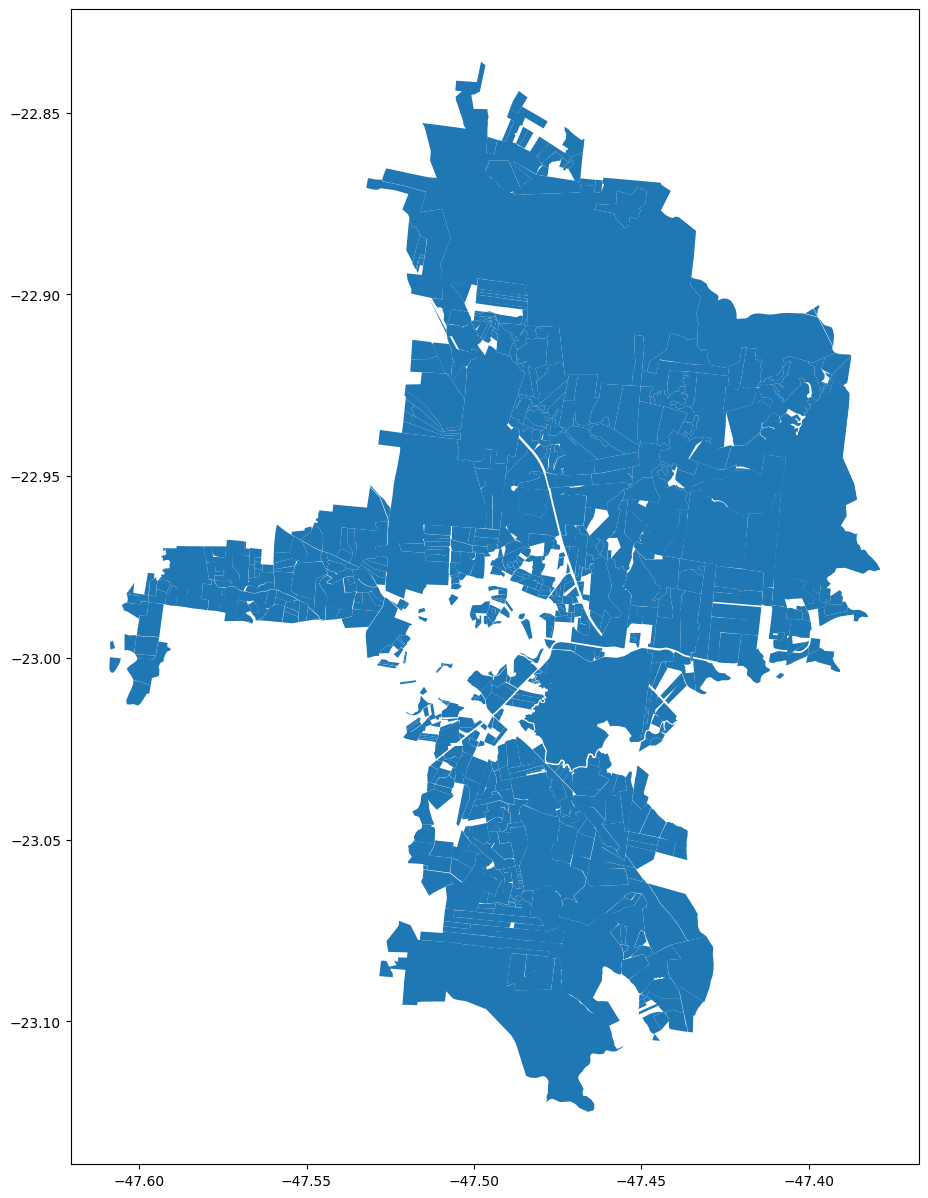

In [5]:
df.plot(figsize=(30,15))

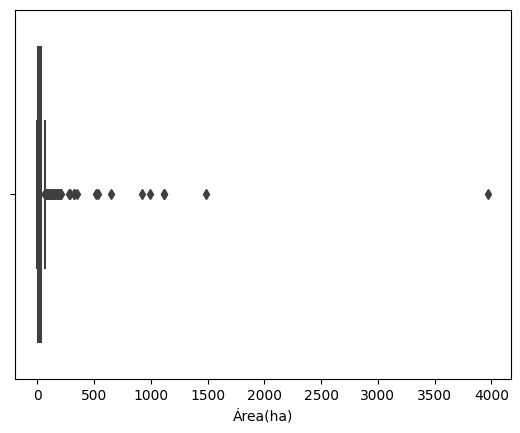

In [5]:
## Distribuição dos imóveis pequenos
sns.boxplot(x=df['Área(ha)'])
plt.show()

<AxesSubplot: xlabel='Área(ha)'>

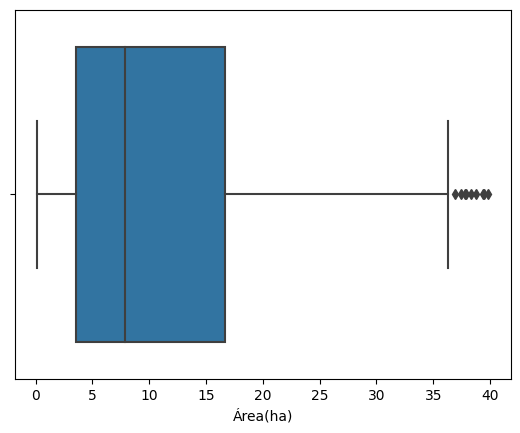

In [8]:
## Distribuição dos imóveis pequenos
pequenos = df[df['Área(ha)'] <= 40]
sns.boxplot(data=pequenos, x='Área(ha)')


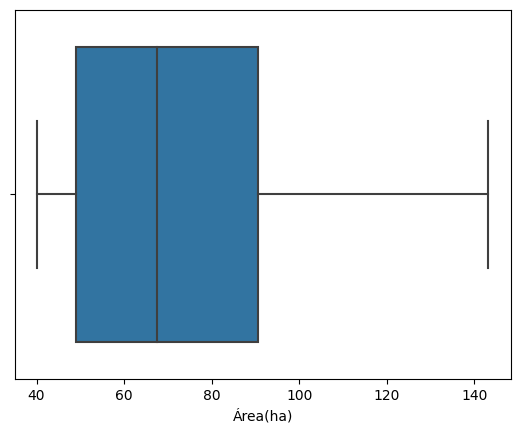

In [11]:
## Distribuição dos imóveis médios (> 40ha e < 150)
medios = df[(df['Área(ha)'] > 40) & (df['Área(ha)'] <= 150)]
sns.boxplot(x=medios['Área(ha)'])
plt.show()


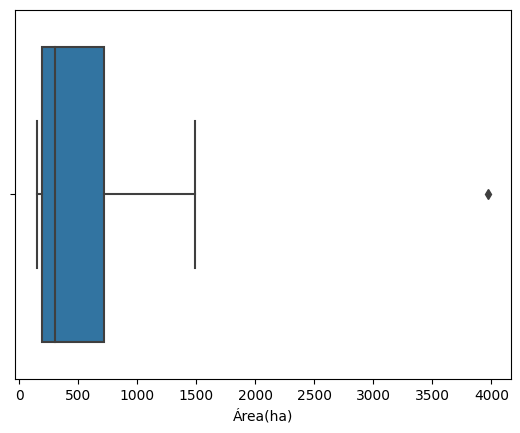

In [12]:
## Distribuição dos grandes imóveis
grandes = df[df['Área(ha)'] > 150]
#sns.boxplot(x=grandes['NUM_AREA'])
sns.boxplot(data=grandes, x='Área(ha)')
plt.show()


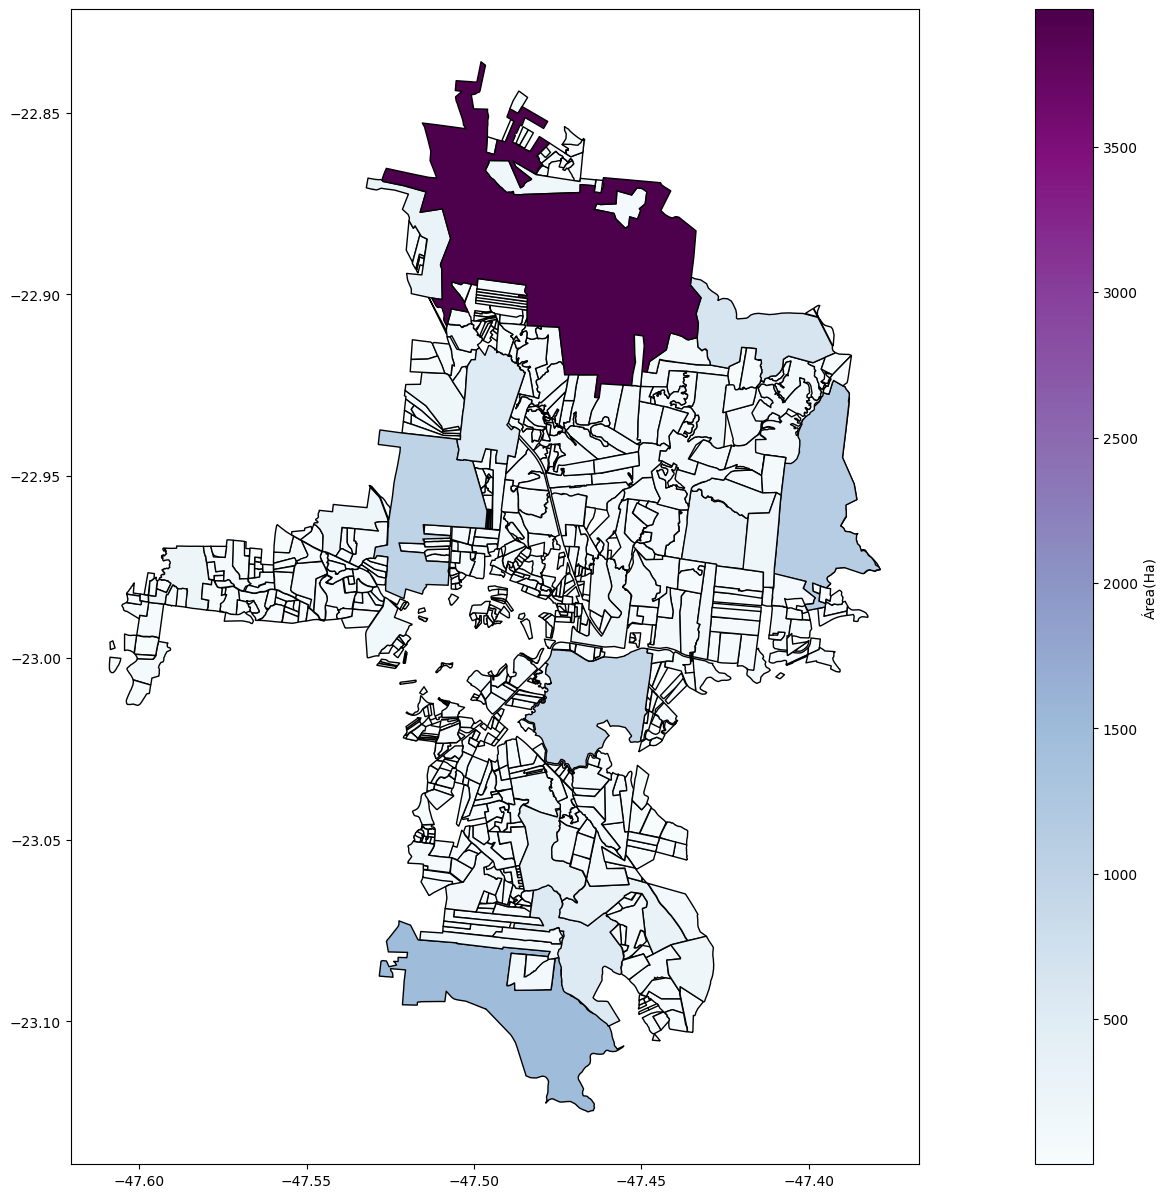

In [36]:
df.plot(column='Ha', cmap='BuPu', edgecolor='k', legend=True, figsize=(30,15),legend_kwds={'label': "Área(Ha)",
    'orientation': "vertical"})
plt.savefig('capivari.png')

In [15]:
pequenos=0
medios=0
grandes=0

for a in df['Área(ha)']:
    if a <= 40:
        pequenos+=1
    if (a > 40) & (a <= 150):
        medios+=1
    if (a > 150): 
        grandes+=1

print("Quantidade de imóveis pequenos (<=40ha):", pequenos)
print("Quantidade de imóveis médios (>40ha e <=150ha):", medios)
print("Quantidade de imóveis grandes (>150ha):", grandes)

Quantidade de imóveis pequenos (<=40ha): 597
Quantidade de imóveis médios (>40ha e <=150ha): 115
Quantidade de imóveis grandes (>150ha): 24


In [18]:
df['tipo'] = 'NaN'
for index, row in df.iterrows():
    if row['Área(ha)'] <= 40:
        df.loc[index,'tipo'] =  str("Pequenas Propriedades")  
    if ((row['Área(ha)'] > 40) and (row['Área(ha)'] <=150)):
        df.loc[index,'tipo'] =  str("Médias Propriedades")  
    if row['Área(ha)'] > 150:
        df.loc[index,'tipo'] =  str("Grandes Propriedades")     


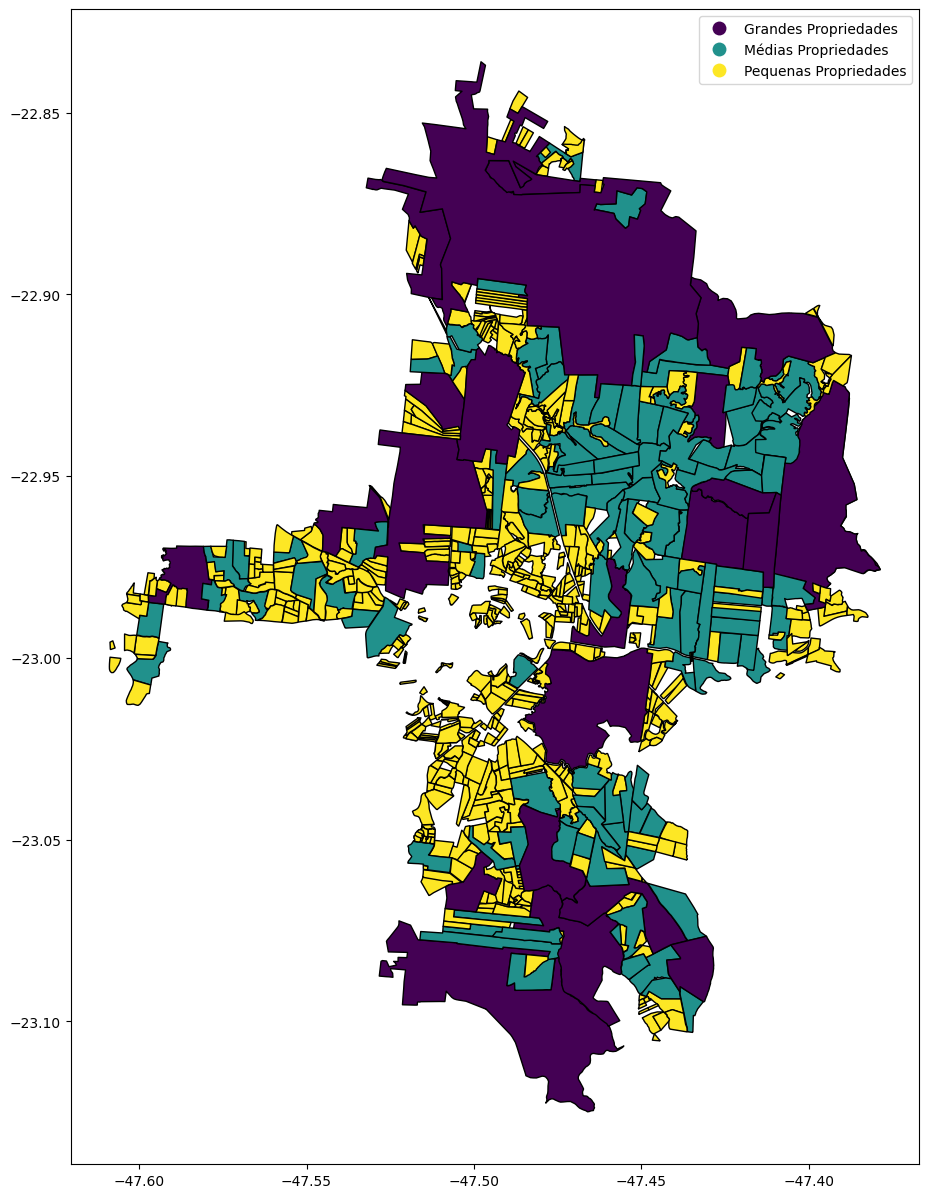

In [19]:
df.plot(column='tipo', cmap='viridis', edgecolor='k', legend=True, figsize=(30,15))
plt.savefig('capivari2.png')